In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Data Analysis

<Axes: xlabel='charges', ylabel='Density'>

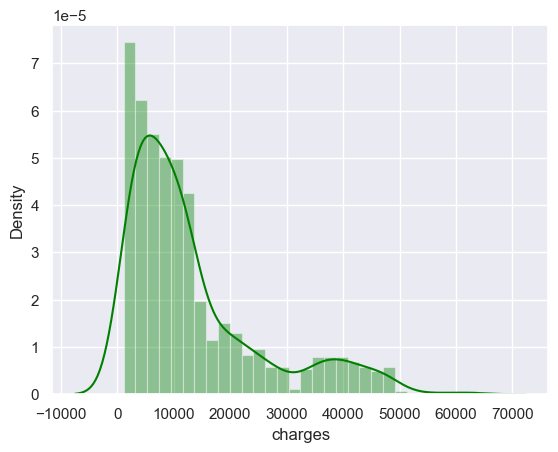

In [38]:
sns.set()
sns.histplot(df['charges'], kde=True, color='green', alpha=0.4, edgecolor=(1,1,1,.4), stat='density', kde_kws={'cut':3})

<Axes: xlabel='bmi', ylabel='Density'>

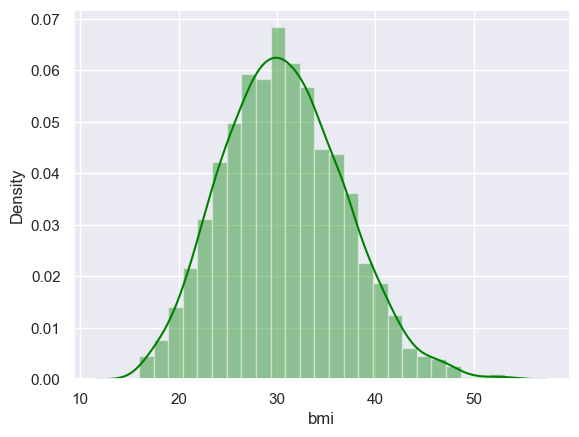

In [39]:
sns.histplot(df['bmi'], kde=True, color='green', alpha=0.4, edgecolor=(1,1,1,.4), stat='density', kde_kws={'cut':3})

<Axes: xlabel='age', ylabel='Density'>

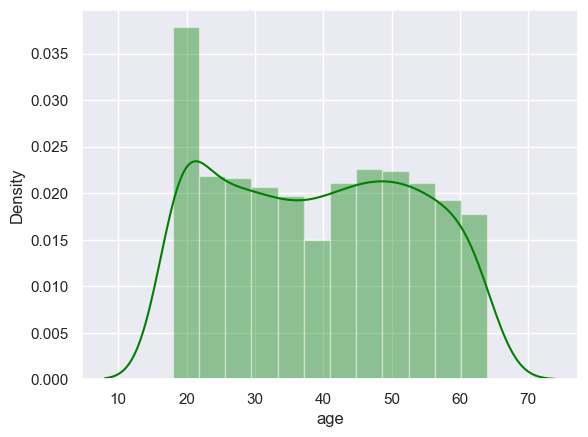

In [40]:
sns.histplot(df['age'], kde=True, color='green', alpha=0.4, edgecolor=(1,1,1,.4), stat='density', kde_kws={'cut':3})

<Axes: xlabel='children', ylabel='Density'>

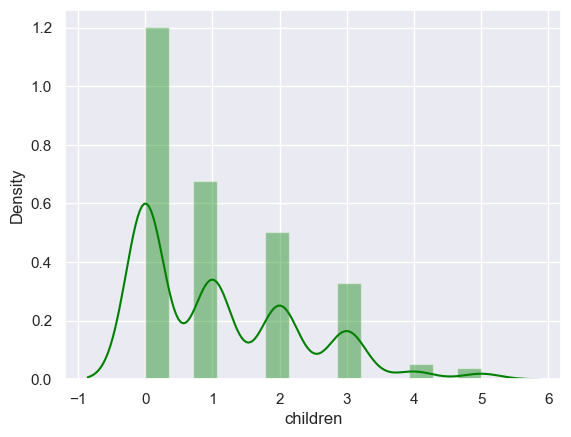

In [41]:
sns.histplot(df['children'], kde=True, color='green', alpha=0.4, edgecolor=(1,1,1,.4), stat='density', kde_kws={'cut':3})

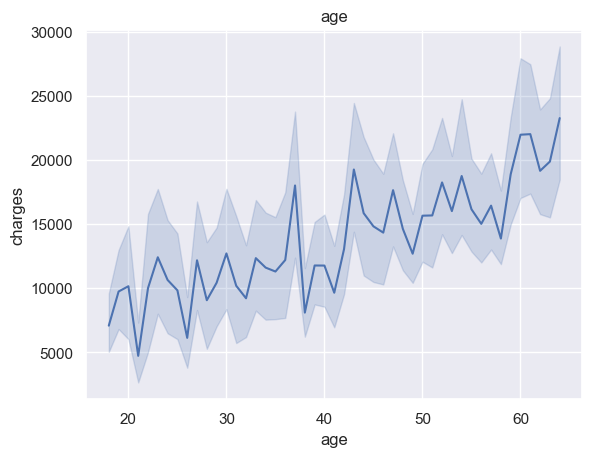

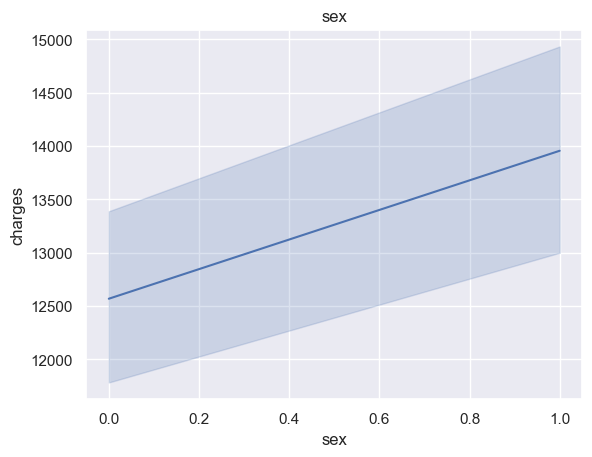

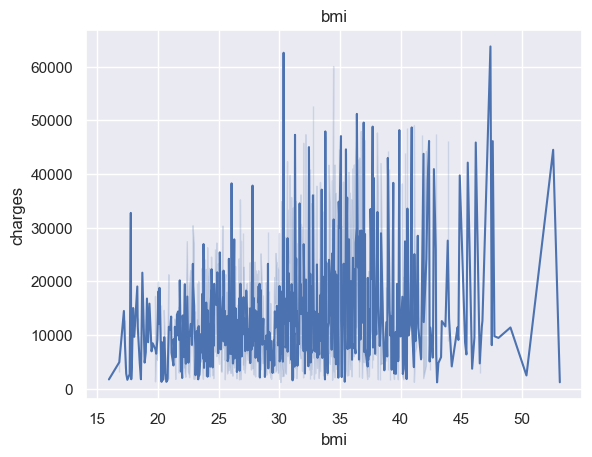

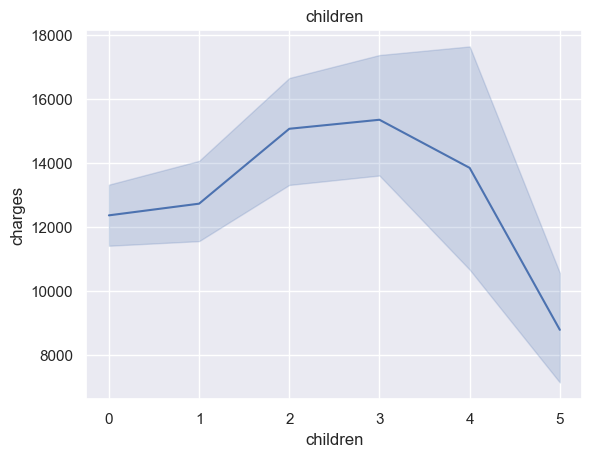

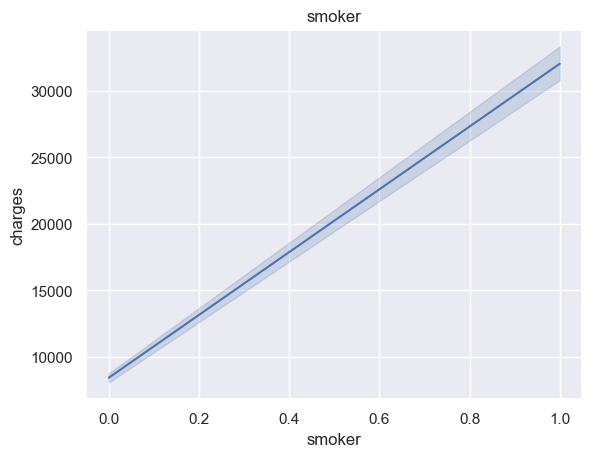

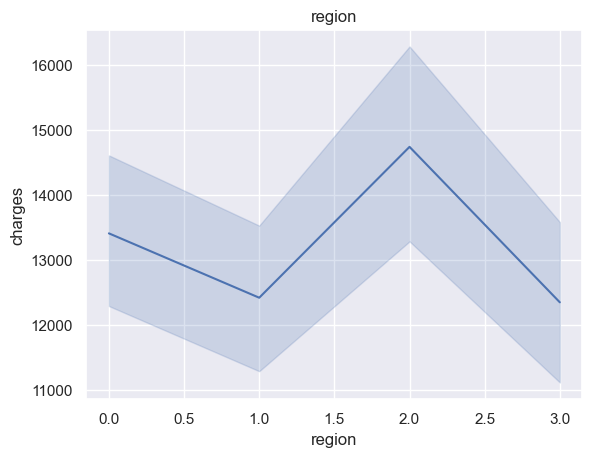

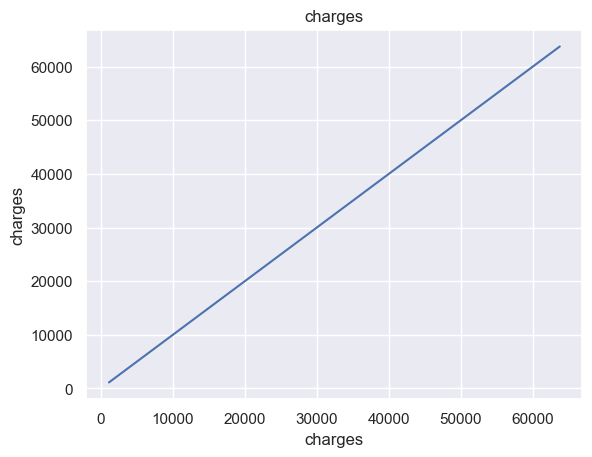

In [64]:
for col in list(df.columns):
    plt.title(col)
    sns.lineplot(y='charges', x=col, data=df)
    plt.show()


### Chnaging Categorical data into numbers

In [31]:
for col in df.select_dtypes(include=object).columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [32]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [35]:
df['sex'].value_counts(), df['region'].value_counts(), df['smoker'].value_counts(), 

(sex
 1    676
 0    662
 Name: count, dtype: int64,
 region
 2    364
 3    325
 1    325
 0    324
 Name: count, dtype: int64,
 smoker
 0    1064
 1     274
 Name: count, dtype: int64)

### Count plots of categorical features 

<Axes: xlabel='sex', ylabel='count'>

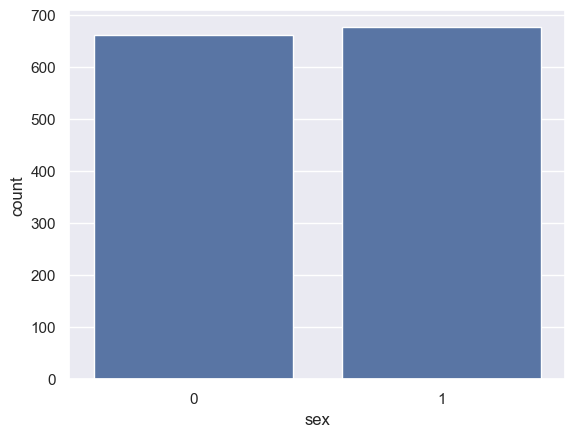

In [44]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='region', ylabel='count'>

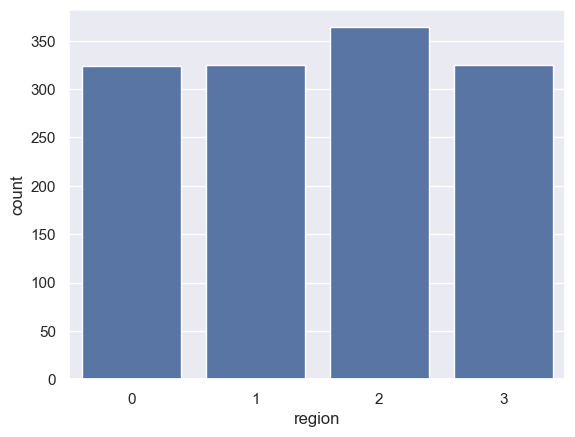

In [45]:
sns.countplot(x='region', data=df)

<Axes: xlabel='smoker', ylabel='count'>

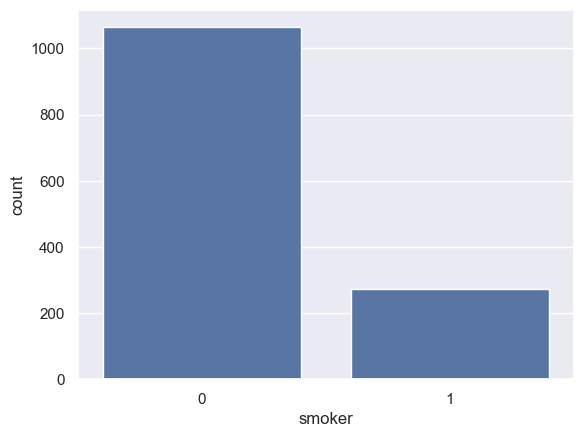

In [46]:
sns.countplot(x='smoker', data=df)

<Axes: xlabel='children', ylabel='count'>

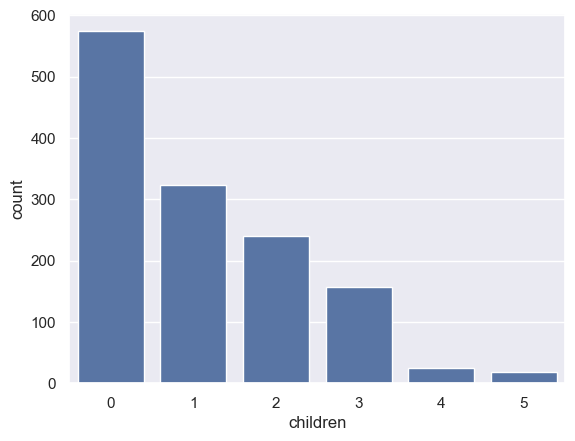

In [47]:
sns.countplot(x='children', data=df)

### Data Pre-Processing 

In [65]:
X = df.drop('charges', axis=1)
y = df['charges']

X, y

(      age  sex     bmi  children  smoker  region
 0      19    0  27.900         0       1       3
 1      18    1  33.770         1       0       2
 2      28    1  33.000         3       0       2
 3      33    1  22.705         0       0       1
 4      32    1  28.880         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 1333   50    1  30.970         3       0       1
 1334   18    0  31.920         0       0       0
 1335   18    0  36.850         0       0       2
 1336   21    0  25.800         0       0       3
 1337   61    0  29.070         0       1       1
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [82]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Training the Model

In [83]:
linreg = LinearRegression()

pipe = make_pipeline(StandardScaler(), linreg)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [84]:
y_ = pipe.predict(X_test)
r2_score(y_test, y_)

0.7635789092385532

In [85]:
x_ = pipe.predict(X_train)
r2_score(y_train, x_)

0.747104669830549

Text(0, 0.5, 'Charges')

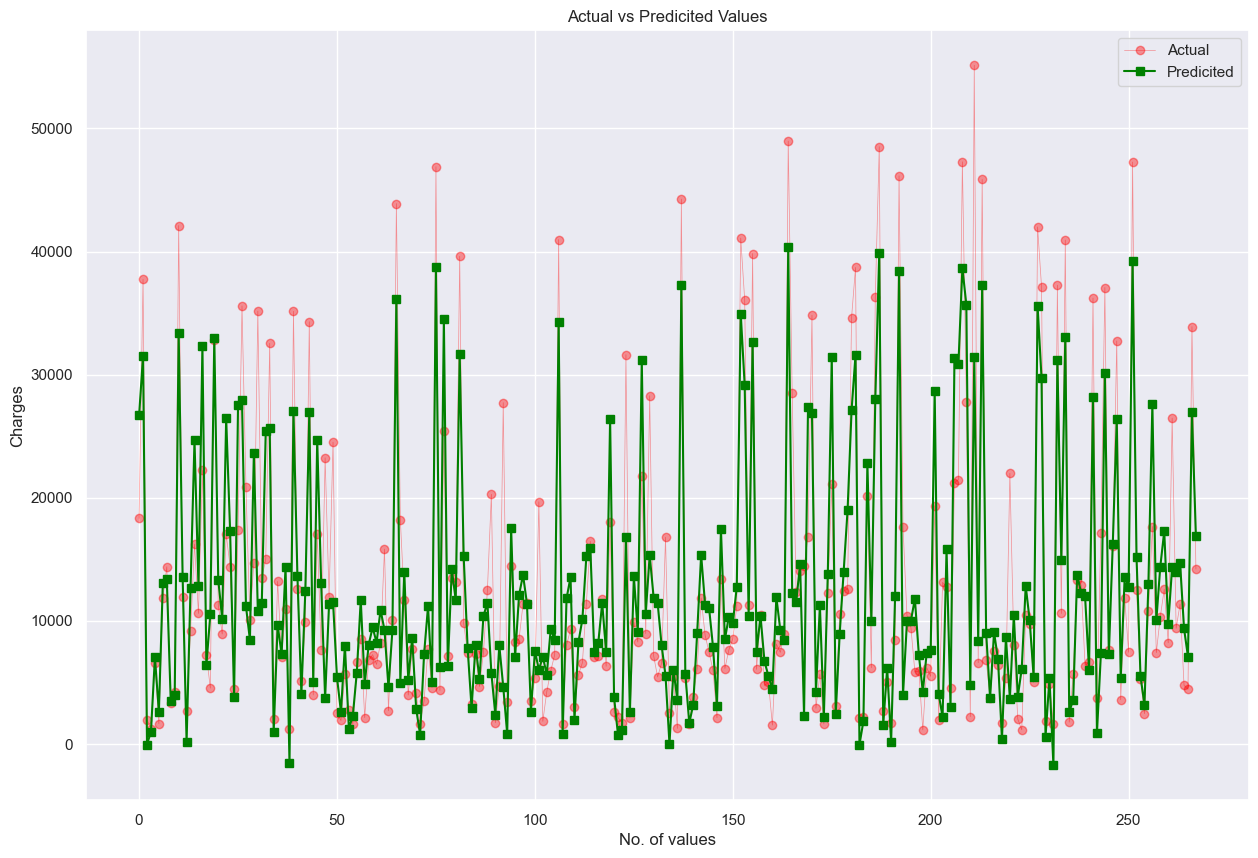

In [93]:
plt.figure(figsize=(15,10))
plt.plot(list(y_test), color='red', label='Actual', marker='o', alpha=0.4, linewidth=0.5)
plt.plot(list(y_), color='green', label='Predicited', marker='s')
plt.legend(loc='best')
plt.title('Actual vs Predicited Values')
plt.xlabel('No. of values')
plt.ylabel('Charges')

## Learning Curve

In [94]:
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10))

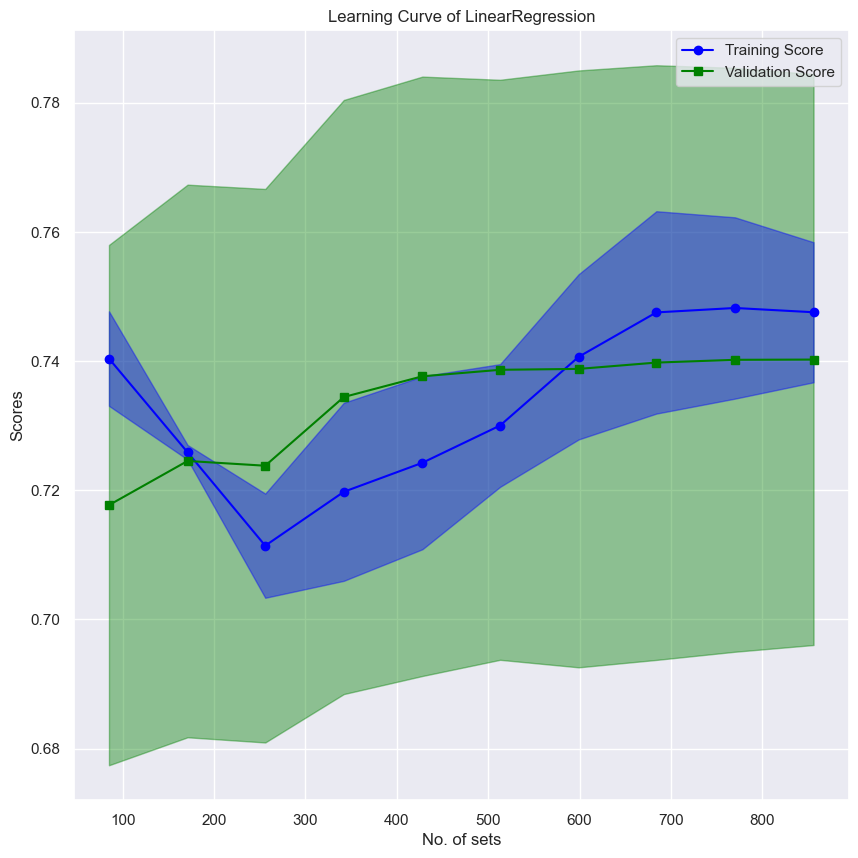

In [107]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, color='blue', label='Training Score', marker='o')
plt.plot(train_sizes, val_scores_mean, color='green', label='Validation Score', marker='s')

plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.4)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.4)

plt.xlabel("No. of sets")
plt.ylabel("Scores")
plt.title("Learning Curve of LinearRegression")
plt.legend(loc='best')

In [103]:
(train_scores), (val_scores)

(array([[0.75503382, 0.73673259, 0.73673259, 0.73673259, 0.73673259],
        [0.72813508, 0.72531937, 0.72531937, 0.72531937, 0.72531937],
        [0.72638894, 0.70185401, 0.70961779, 0.70961779, 0.70961779],
        [0.74462458, 0.7250963 , 0.70970121, 0.70970121, 0.70970121],
        [0.74716706, 0.73196008, 0.71405593, 0.71405593, 0.71405593],
        [0.74655818, 0.73406446, 0.71944854, 0.72503768, 0.72503768],
        [0.76069842, 0.74970436, 0.73696449, 0.72798388, 0.72798388],
        [0.76912889, 0.75964672, 0.74885214, 0.72943182, 0.73064828],
        [0.76735263, 0.75922818, 0.74962059, 0.73215224, 0.73279048],
        [0.76023551, 0.75264738, 0.74458793, 0.72827022, 0.75209779]]),
 array([[0.66968254, 0.69487145, 0.72482606, 0.78960021, 0.7095463 ],
        [0.66902539, 0.69877713, 0.73835111, 0.79661731, 0.71991883],
        [0.66975137, 0.70181846, 0.74264481, 0.79591783, 0.70888224],
        [0.67232525, 0.71301221, 0.74989244, 0.81152095, 0.72545666],
        [0.6766529

In [108]:
import pickle
with open('model.dat', 'wb') as file:
    pickle.dump(pipe, file)